In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle


In [11]:
data = pd.read_csv(r"C:\Users\SUBHASISH NATH\Downloads\salary_prediction_data.csv")
data.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [12]:
data

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864
996,High School,24,Urban,Engineer,30,Female,74468.205020
997,Master,18,Rural,Analyst,44,Male,98207.026024
998,Bachelor,27,Suburban,Director,31,Female,108544.922720


In [13]:
data.head(10)

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
5,PhD,19,Rural,Director,27,Female,156312.936208
6,PhD,4,Rural,Director,60,Female,130567.649455
7,PhD,13,Suburban,Director,49,Female,148707.740759
8,Bachelor,20,Urban,Engineer,25,Female,95945.275429
9,PhD,14,Urban,Analyst,58,Female,133339.389682


In [14]:
data.shape

(1000, 7)

In [15]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [16]:
data.isnull().sum()
data['Education'].value_counts()

Education
High School    255
Bachelor       253
PhD            251
Master         241
Name: count, dtype: int64

In [17]:
X = data.drop("Salary", axis=1)
y = data["Salary"]

In [19]:
category_features = ['Education', 'Location', 'Job_Title', 'Gender']
numerical_features = ['Experience', 'Age']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), category_features),
    ('num', StandardScaler(), numerical_features)
])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Define pipeline with Gradient Boosting
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42))
])

# Fit the model
model.fit(X_train, y_train)

# Cross-validation scores
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))



Cross-validated R² scores: [0.85109484 0.84142025 0.85311535 0.82117837 0.80568936]
Average R²: 0.8344996328260776


Test MSE: 130219122.22
Test R² Score: 0.8405


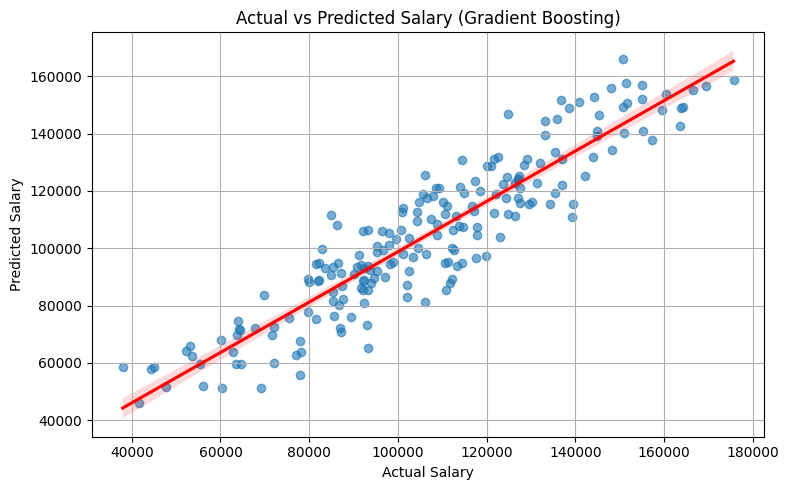

In [32]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test R² Score: {r2:.4f}")

# Visualization
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"}, scatter_kws={"alpha": 0.6})
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary (Gradient Boosting)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
import joblib

joblib.dump(model, "salary_analysis.joblib")
print("Model saved as salary_analysis.joblib")


Model saved as salary_analysis.joblib


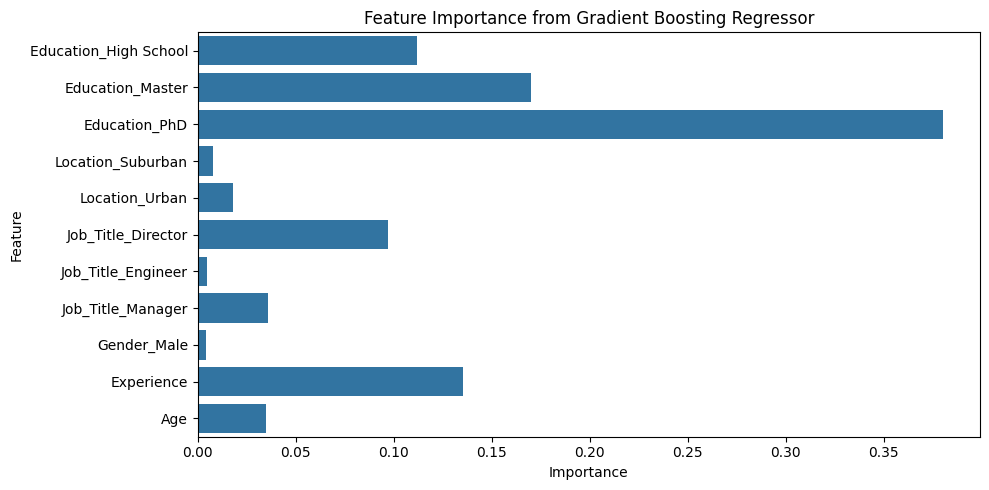

In [36]:
# Extract feature names after preprocessing
ohe = model.named_steps['preprocessing'].transformers_[0][1]
encoded_feature_names = ohe.get_feature_names_out(category_features)
final_feature_names = list(encoded_feature_names) + numerical_features

# Get feature importances from the regressor
importances = model.named_steps['regressor'].feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=final_feature_names)
plt.title("Feature Importance from Gradient Boosting Regressor")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
